In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values

In [ ]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]




In [ ]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [ ]:
#Using a linear kernel 
from sklearn import svm
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []

#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

print()

#test
print("Test Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)
    yhat_svc_linear_test = svc_linear.predict(x_test)
    acc_test_linear = np.mean(yhat_svc_linear_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test_linear)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_linear)
    #print('Test Accuracy = {0:f}'.format(acc_test_linear))
    



Train Accuracy using a Linear kernel
Train Accuracy(c=0.0001): 0.8295170290552242
Train Accuracy(c=0.001): 0.9794111987685203
Train Accuracy(c=0.01): 0.9828747354242833
Train Accuracy(c=0.1): 0.9847989224552627
Train Accuracy(c=1): 0.9846065037521647
Train Accuracy(c=10): 0.9846065037521647
Train Accuracy(c=100): 0.9846065037521647

Test Accuracy using a Linear kernel
Test Accuracy(c=0.0001): 0.8076923076923077
Test Accuracy(c=0.001): 0.9746153846153847
Test Accuracy(c=0.01): 0.9807692307692307
Test Accuracy(c=0.1): 0.9815384615384616
Test Accuracy(c=1): 0.9823076923076923
Test Accuracy(c=10): 0.9815384615384616
Test Accuracy(c=100): 0.9815384615384616


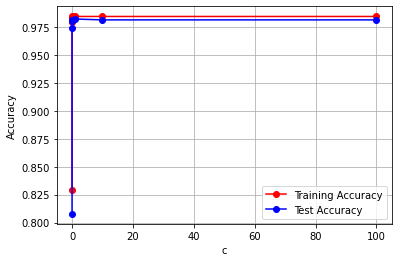

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_linear, 'ro-')
plt.plot(cVals, acc_test_svm_linear, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
#Using a rbf kernel 
acc_train_svm_rbf = []
acc_test_svm_rbf = []

#train
print("Train Accuracy using a RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)

    yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train_rbf = np.mean(yhat_svc_rbf_train == y_train)
    acc_train_svm_rbf.append(acc_train_rbf)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_rbf)

print()

#test
print("Test Accuracy using a RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)
    yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test_rbf = np.mean(yhat_svc_rbf_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test_rbf)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_rbf)

Train Accuracy using a RBF kernel
Train Accuracy(c=0.0001): 0.7577448527996922
Train Accuracy(c=0.001): 0.7577448527996922
Train Accuracy(c=0.01): 0.9782566865499327
Train Accuracy(c=0.1): 0.9898018087358091
Train Accuracy(c=1): 0.9944198576101597
Train Accuracy(c=10): 0.9971137194535309
Train Accuracy(c=100): 0.9986530690783144

Test Accuracy using a RBF kernel
Test Accuracy(c=0.0001): 0.7384615384615385
Test Accuracy(c=0.001): 0.7384615384615385
Test Accuracy(c=0.01): 0.9715384615384616
Test Accuracy(c=0.1): 0.9853846153846154
Test Accuracy(c=1): 0.9892307692307692
Test Accuracy(c=10): 0.9876923076923076
Test Accuracy(c=100): 0.9861538461538462


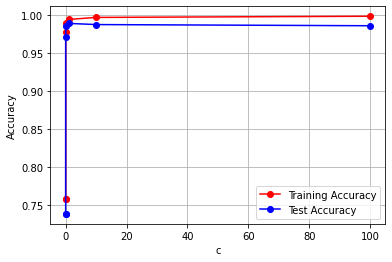

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_rbf, 'ro-')
plt.plot(cVals, acc_test_svm_rbf, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
#Using a Polynomial kernel 
acc_train_svm_poly = []
acc_test_svm_poly = []

#train
print("Train Accuracy using a poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)

    yhat_svc_poly_train = svc_poly.predict(x_train)
    acc_train_poly = np.mean(yhat_svc_poly_train == y_train)
    acc_train_svm_poly.append(acc_train_poly)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_poly)

print()

#test
print("Test Accuracy using a poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)
    yhat_svc_poly_test = svc_poly.predict(x_test)
    acc_test_poly = np.mean(yhat_svc_poly_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test_poly)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_poly)

Train Accuracy using a poly kernel
Train Accuracy(c=0.0001): 0.7644795074081201
Train Accuracy(c=0.001): 0.8549162978641524
Train Accuracy(c=0.01): 0.9418895516644218
Train Accuracy(c=0.1): 0.9720992880507985
Train Accuracy(c=1): 0.9886472965172215
Train Accuracy(c=10): 0.99345776409467
Train Accuracy(c=100): 0.9949971137194535

Test Accuracy using a poly kernel
Test Accuracy(c=0.0001): 0.7476923076923077
Test Accuracy(c=0.001): 0.8461538461538461
Test Accuracy(c=0.01): 0.9315384615384615
Test Accuracy(c=0.1): 0.9661538461538461
Test Accuracy(c=1): 0.9815384615384616
Test Accuracy(c=10): 0.9869230769230769
Test Accuracy(c=100): 0.9853846153846154


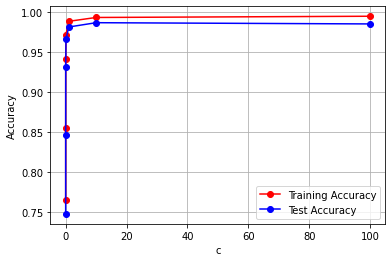

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_poly, 'ro-')
plt.plot(cVals, acc_test_svm_poly, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')